In this notebook I'll predict the salary of a employer depend on his/her years experience by using Gradient Descent algorithm. This is a very simple problem because it just have 1 feature so that the weight will just have 1 parameter

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math

In [62]:
# Load data 
data = pd.read_csv('Salary_Data.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


We can see that the salary is $>=$ 30000$. If we keep the data the same, the calcuted weight and bias will very big. In order that, I'll divide the salary by 10000 to make weight and bias become small

In [63]:
# Split data into input X and output y
X = data['YearsExperience']
y = data['Salary'] / 10000
print(X.shape, y.shape)
print(X, y)

(30,) (30,)
0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64 0      3.9343
1      4.6205
2      3.7731
3      4.3525
4      3.9891
5      5.6642
6      6.0150
7      5.4445
8      6.4445
9      5.7189
10     6.3218
11     5.5794
12     5.6957
13     5.7081
14     6.1111
15     6.7938
16     6.6029
17     8.3088
18     8.1363
19     9.3940
20     9.1738
21     9.8273
22    10.1302
23    11.3812
24    10.9431
25    10.5582
26    11.6969
27    11.2635
28    12.2391
29    12.1872
Name: Salary, dtype: float64


In Linear Regression problem, the cost function of the model is defined as:
$$
    J_{w, b} = \frac{1}{2m}\sum_{i = 0}^{m-1} (f(\vec{X^{(i)}}) - y^{(i)})^2
$$
where $f(\vec{X}) = \vec{w}\vec{X} + b$

In [64]:
# This function compute the cost of model in each pair (w, b)
def compute_cost(X, y, w, b):
    
    cost = 0 # total cost of model
    m = X.shape[0] # number of samples

    for i in range(m):
        f_wb = w * X[i] + b                # Linear function
        cost += (f_wb - y[i])**2           # Loss function over a sample
    cost /= 2*m
    return cost

The gradient of the cost function w.r.t each parameter is defined:
$$
    \frac{\partial J}{\partial w_{j}} = \frac{1}{m}\sum_{i = 0}^{m-1} (f(\vec{X}^{(i)}) - y^{(i)}) X^{(i)}_{j}
$$
and 
$$
    \frac{\partial J}{\partial b} = \frac{1}{m}\sum_{i = 0}^{m-1} (f(\vec{X}^{(i)}) - y^{(i)})
$$

In [65]:
# This function compute the gradient of cost in each pair (w, b)
def compute_gradient(X, y, w, b):
    m = X.shape[0] # number of samples
    dj_dw = 0      # gradient of cost wrt w
    dj_db = 0      # gradient of cost wrt b

    for i in range(m):
        f_wb = w * X[i] + b
        dj_dw += (f_wb - y[i]) * X[i]
        dj_db += (f_wb - y[i])
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

So now, we update the pair ($w$, $b$) after each iteration until convergence:
$$
    w_{j} = w_{j} - \alpha \frac{\partial J}{\partial w_{j}} 
$$
and 
$$
    b = b - \alpha \frac{\partial J}{\partial b}
$$
where $\alpha$ is learning rate

In [66]:
# This function compute the update of pair (w, b) through each iteration

def gradient_descent(X, y, w_init, b_init, iteration, alpha):
    w = copy.deepcopy(w_init)
    b = copy.deepcopy(b_init)
    m = X.shape[0]
    
    for i in range(iteration):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J = compute_cost(X, y, w, b)
        if i%100 == 0:
            print(f"J, w, b in iteration {i:5}: {J:5.3f} {w:5.3f} {b:5.3f}")

    return w, b

In [73]:
iteration = 10000
alpha = 0.01
w_init, b_init = 1, 1
w_out, b_out = gradient_descent(X, y, w_init, b_init, iteration, alpha)

print(f"w, b founded by the model: {w_out:5f} {b_out:5f}")

J, w, b in iteration     0: 0.647 1.064 1.013
J, w, b in iteration   100: 0.326 1.131 1.325
J, w, b in iteration   200: 0.268 1.096 1.564
J, w, b in iteration   300: 0.229 1.067 1.758
J, w, b in iteration   400: 0.204 1.044 1.915
J, w, b in iteration   500: 0.188 1.025 2.042
J, w, b in iteration   600: 0.177 1.010 2.144
J, w, b in iteration   700: 0.170 0.997 2.227
J, w, b in iteration   800: 0.165 0.987 2.294
J, w, b in iteration   900: 0.162 0.979 2.349
J, w, b in iteration  1000: 0.160 0.973 2.393
J, w, b in iteration  1100: 0.159 0.967 2.428
J, w, b in iteration  1200: 0.158 0.963 2.457
J, w, b in iteration  1300: 0.157 0.960 2.480
J, w, b in iteration  1400: 0.157 0.957 2.499
J, w, b in iteration  1500: 0.157 0.955 2.515
J, w, b in iteration  1600: 0.157 0.953 2.527
J, w, b in iteration  1700: 0.157 0.951 2.537
J, w, b in iteration  1800: 0.156 0.950 2.545
J, w, b in iteration  1900: 0.156 0.949 2.551
J, w, b in iteration  2000: 0.156 0.948 2.557
J, w, b in iteration  2100: 0.156 

So that we have $w$ = 0.944996 and $b$ = 2.579220

In [82]:
X_test = data['YearsExperience']
y_test = data['Salary'] / 10000

y_predict = (w_out * X_test + b_out)
diff = np.sum(y_predict - y_test) / X.shape[0]
print(diff)

-2.0917029589876773e-10


The difference is very small, so that the line fit the data quite well!

In [84]:
# Check the accuracy by using scikitlearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

linearmodel = LinearRegression()

X_train = data['YearsExperience'].values.reshape(-1, 1)
y_train = data['Salary'].values / 10000

linearmodel.fit(X_train, y_train)

print(f"w, b by GD:          ({w_out:5f}, {b_out:5f})")
print(f"w, b by scikitlearn: ({linearmodel.coef_[0]:5f}, {linearmodel.intercept_:5f})")

w, b by GD:          (0.944996, 2.579220)
w, b by scikitlearn: (0.944996, 2.579220)


So that the weight and bias computed by Gradient descent algorithm is exactly!.
Now we'll plot the line decribe the function:

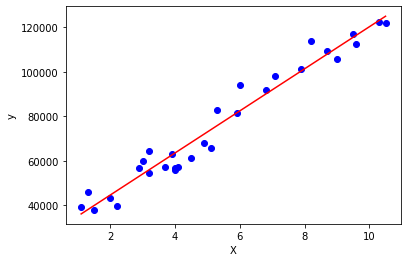

In [70]:
# Visualize the output:
plt.scatter(X, y * 10000, color = 'b')
plt.plot(X_test, y_predict, color = 'r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [88]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.1)

model2 = LinearRegression()

model2.fit(X_train1, y_train1)
print(f"w, b founded by Linear Regression: ({model2.coef_[0]:5f}, {model2.intercept_:5f})")
print(f"accuracy: {model2.score(X_test1, y_test1)}")

w, b founded by Linear Regression: (0.958889, 2.502330)
accuracy: 0.9924480550398919


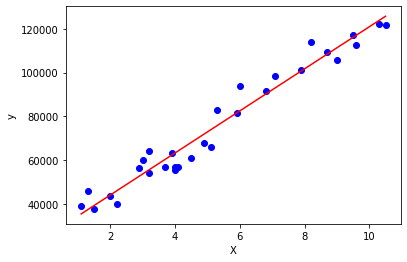

In [91]:
w, b = model2.coef_[0], model2.intercept_
# Visualize the output:
plt.scatter(X, y * 10000, color = 'b')
plt.plot(X_train, (w*X_train + b)*10000, color = 'r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()